In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [13]:
#doc du lieu
df = pd.read_csv("./data/standardize_data.csv")


In [14]:
X,Y = df.iloc[:,:-1], df.iloc[:,-1]

# Calculate covariance and correlation

In [15]:
# ham covariance
def covariance(x,y):
    mean_x, mean_y = x.mean(), y.mean()
    n=len(x)
    return sum((x-mean_x)*(y-mean_y))/n

In [16]:
#ham correlation
def correlation(x, y):
    std_x = covariance(x,x)
    std_y = covariance(y,y)
    return covariance(x,y) / np.sqrt(std_x * std_y)

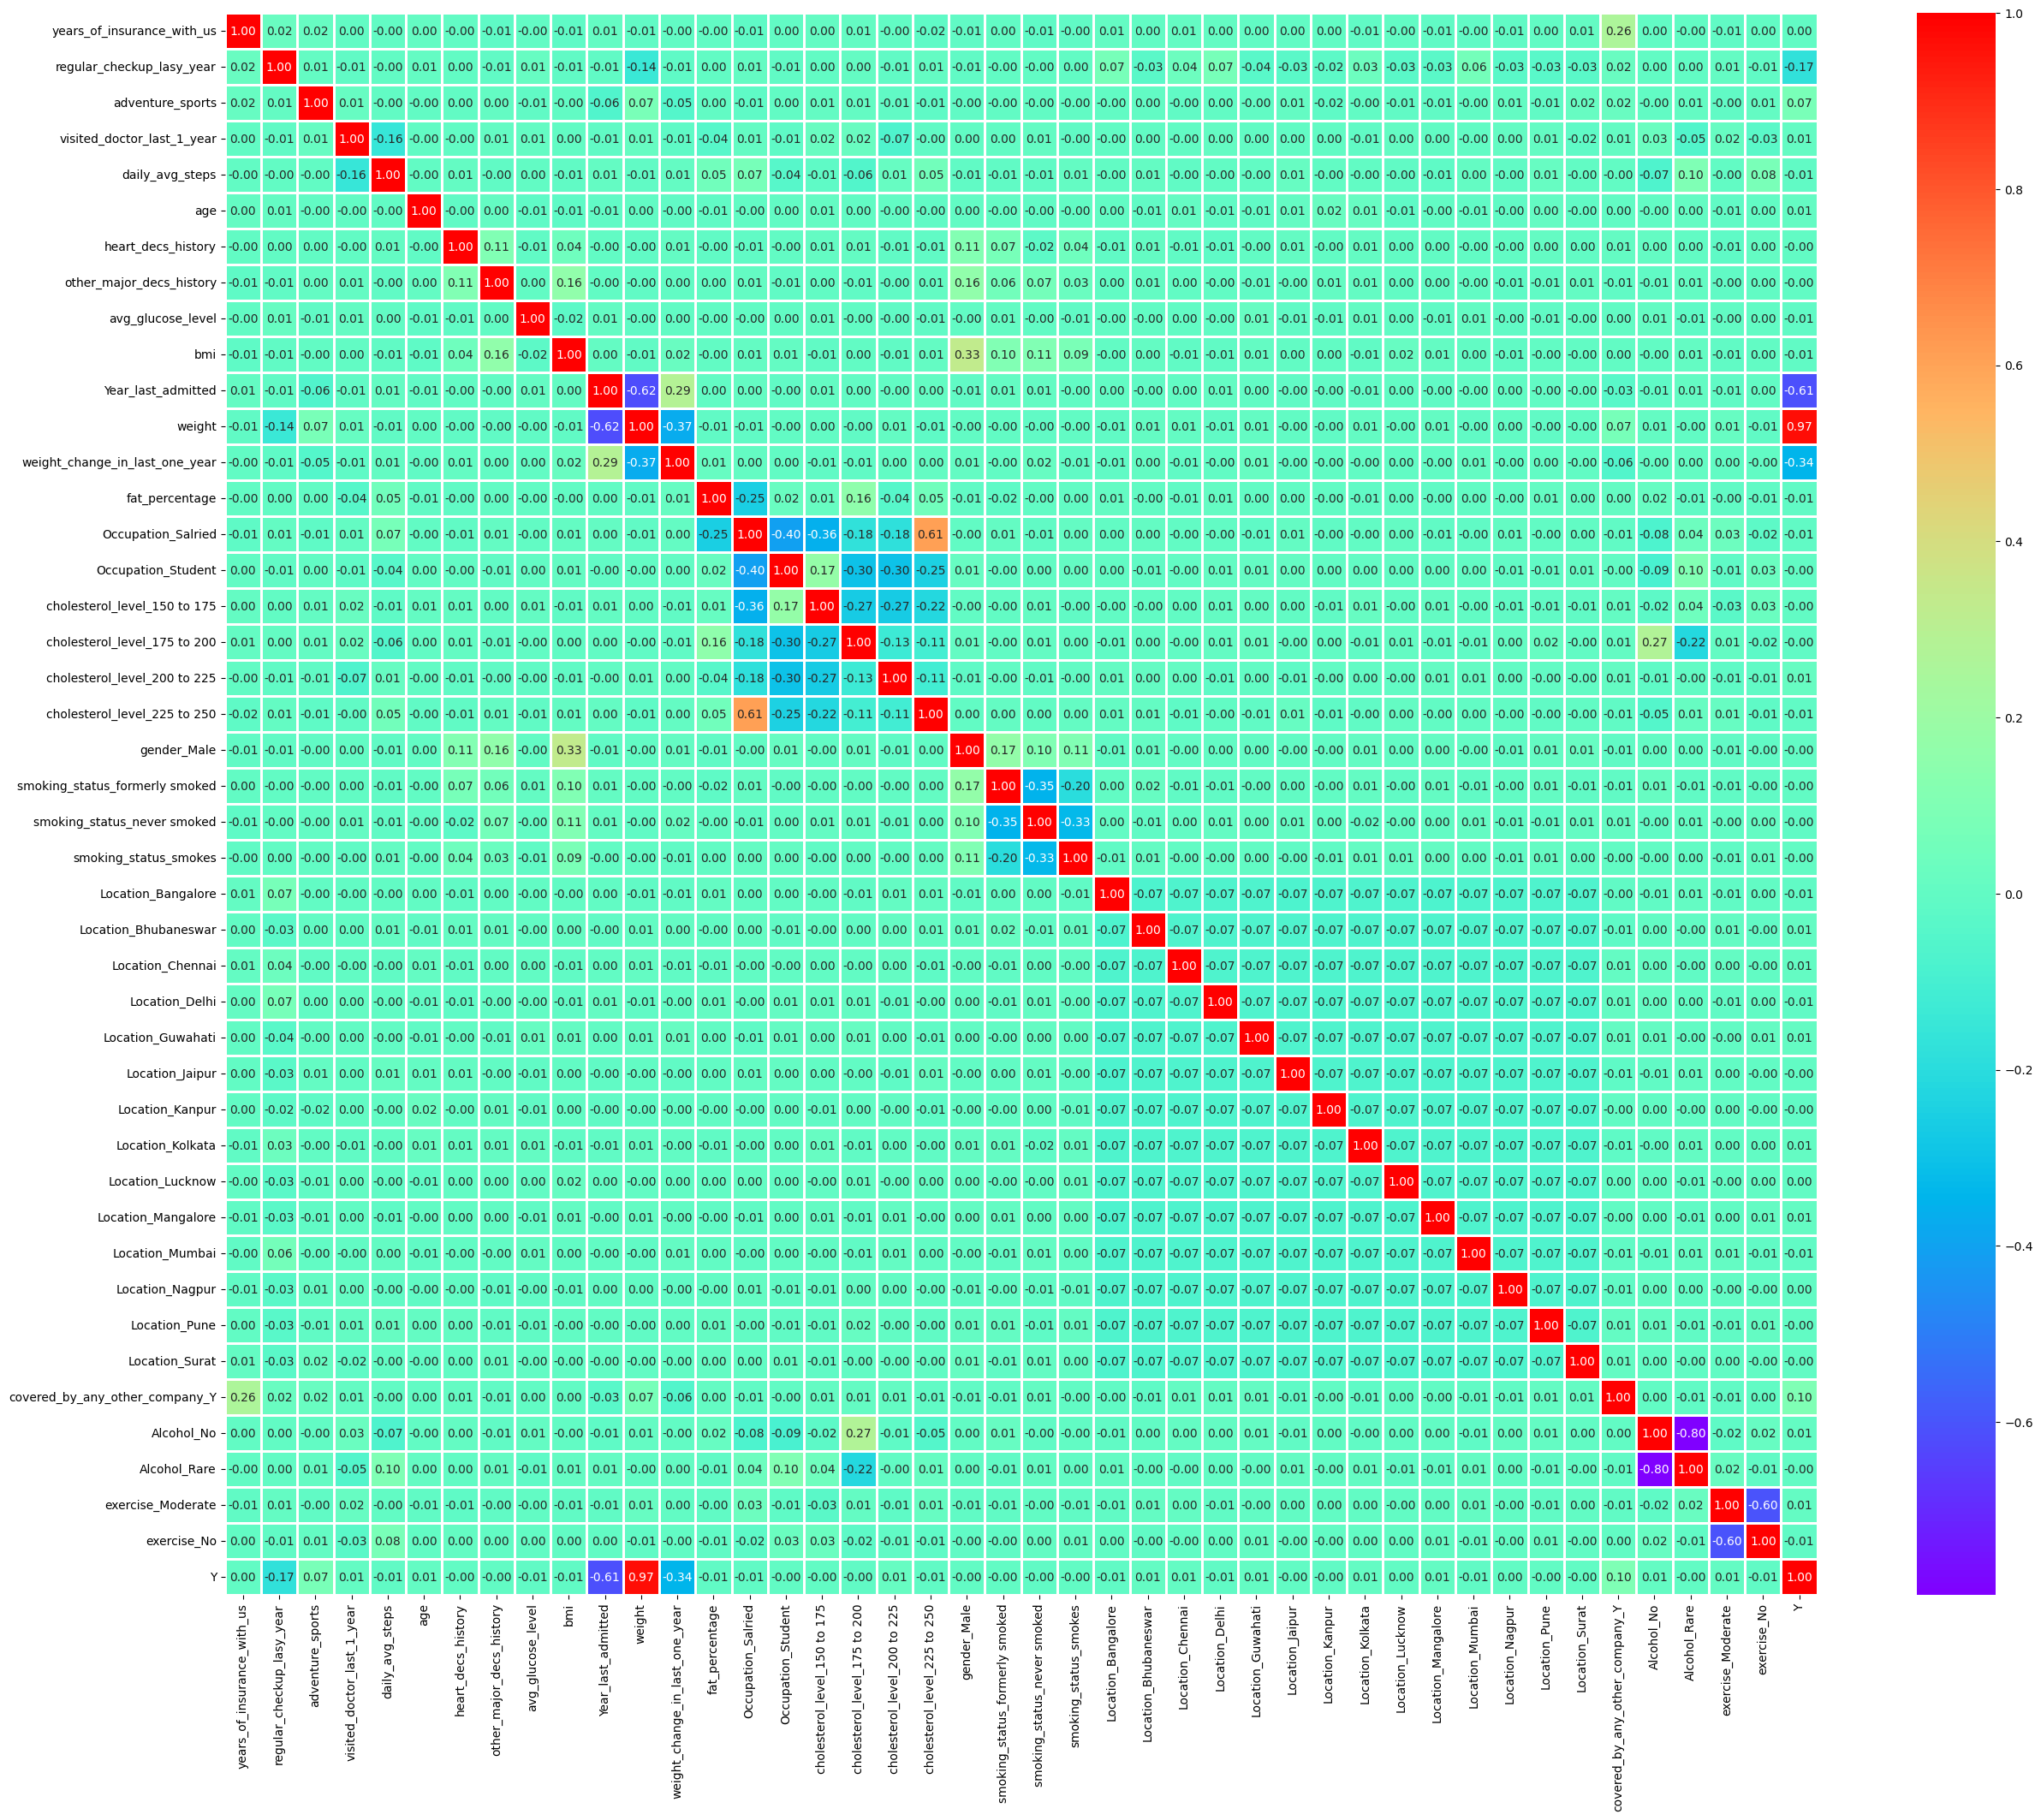

In [17]:
corr = {}
for i in range(len(X.columns)):
    cur = []
    for j in range(len(X.columns)):
        cur.append(correlation(X.iloc[:, i], X.iloc[:, j]))
    cur.append(correlation(X.iloc[:, i], Y))
    corr[X.columns[i]] = cur
cur = []
for i in range(len(X.columns)):
    cur.append(correlation(X.iloc[:, i], Y))
cur.append(correlation(Y, Y))
corr['Y'] = cur
corr = pd.DataFrame(corr, columns=corr.keys(), index=corr.keys())
fig, ax = plt.subplots(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', fmt=".2f", ax=ax)
plt.show()


# Drop feature

In [18]:
for column in X.columns:
    if abs(corr[column]["Y"]) < 0.2:
        df = df.drop(column, axis=True)
print(df.columns)


Index(['Year_last_admitted', 'weight', 'weight_change_in_last_one_year',
       'insurance_cost'],
      dtype='object')


In [19]:
def train_test_split(dataset, test_size=0.2):
    train_size = int(len(X) * (1 - test_size))
    test_size = int(len(X) * test_size)
    train = dataset.sample(train_size)
    test = dataset.sample(test_size)
    X_train = train.iloc[:, :-1]
    X_test = test.iloc[:, :-1]
    Y_train = train.iloc[:, -1]
    Y_test = test.iloc[:, -1]
    pd.DataFrame(Y_test).to_csv("./data/knn/Y_test.csv", index=False)
    return X_train, X_test, Y_train, Y_test


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df, 0.3)


In [21]:
class KnnModel():
    
    # tinh khoang cach
    def distance(self, x, y):
        res=0
        for i in range(len(y)):
            res += (x[i]-y[i])**2
        return np.sqrt(res)
    
    # dua data train vao
    def fit(self, X_train):
        self.X_train = X_train
        return True
    
    # lay cac phan tu gan no
    def get_neighbors(self, test_row, num_neighbors):
        distances = list()
        for i in range(len(self.X_train)-1):
            dist = self.distance(self.X_train.iloc[i], test_row)
            distances.append((self.X_train.iloc[i], dist))
        distances.sort(key=lambda dis: dis[1])
        neighbors = list()
        for i in range(num_neighbors):
            neighbors.append(distances[i][0])
        return neighbors

    def predict_classification(self, test_row, num_neighbors):
        neighbors = self.get_neighbors(test_row, num_neighbors)
        print(type(neighbors[0]))
        output_values = np.asarray([row[-1] for row in neighbors])
        return np.mean(output_values)
    
    
    #du doan
    def predict(self, X_test, num_neighbors):
        listPredict = list()
        for i in range(100):
            listPredict.append(self.predict_classification(X_test.iloc[i], num_neighbors))
        
        print(listPredict)
        listPredict = pd.DataFrame(listPredict)
        listPredict.to_csv("./data/knn/predicted.csv",
                           header=["Predicted"], index=False)
    
model=KnnModel()
model.fit(pd.concat([X_train, Y_train], axis=1))

True

In [22]:
model.predict(X_test, 5)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

# Sklearn

In [23]:
md = KNeighborsClassifier()
md = md.fit(X_train, Y_train)
predicted_y=md.predict(X_test)
result = pd.DataFrame(predicted_y)
result.to_csv("./data/knn/predict_sklearn.csv",
              header=["Predicted"], index=False)
